<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/master/Project%2011/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras_lr_finder

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras_lr_finder import LRFinder
from keras.optimizers import SGD
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

np.random.seed(2017) 
% matplotlib inline

Using TensorFlow backend.


# Downloading the CIFAR 10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
print("Number of classes: " + str(num_classes))
print("Number of training samples: " + str(num_train))
print("Training features shape: " + str(train_features.shape))

Number of classes: 10
Number of training samples: 50000
Training features shape: (50000, 32, 32, 3)


# Visuaizing one element of each class from the cifar 10 dataset

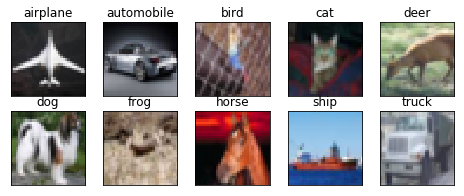

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Setting up train and test datasets

In [0]:
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# Performing image normalization

In [0]:
img_norm_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
img_norm_datagen.fit(train_features)

X_train, Y_train = img_norm_datagen.flow(train_features, train_labels, batch_size=len(train_features), shuffle=False).next()
X_test, Y_test = img_norm_datagen.flow(test_features, test_labels, batch_size=len(test_features), shuffle=False).next()

# convert class labels to binary class labels
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [0]:
print(X_train.mean(), X_train.std())
print(X_test.mean(), X_test.std())

-2.1983838e-06 0.9999975
0.012807535 0.9986801


# Best model from given 6A assignment

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())

model.add(Activation('softmax'))


#Using the SGD optimizer with nesterov momentum
sgd_optimizer = SGD(lr=0.005, momentum=0.9, nesterov=False) 
#Fixing an arbitrary learning rate for now

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

### Total params: 455,370

# Implementing cutout

Using reference implementation from https://github.com/yu4u/cutout-random-erasing

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# Helper functions

## Plotting model accuracy history over epochs

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Computing model accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# Finding the right learning rate using LR finder

In [0]:
lr_finder = LRFinder(model)
lr_finder.find(X_train, Y_train, 0.000001, 0.5, 128, 5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
50000/50000 [==============================] - 30s 592us/step - loss: 3.0957 - acc: 0.1188
Epoch 2/5
50000/50000 [==============================] - 27s 534us/step - loss: 2.2545 - acc: 0.2204
Epoch 3/5
50000/50000 [==============================] - 27s 539us/step - loss: 1.7375 - acc: 0.3710
Epoch 4/5
50000/50000 [==============================] - 27s 532us/step - loss: 1.3673 - acc: 0.5260
Epoch 5/5
50000/50000 [==============================] - 27s 535us/step - loss: 1.2790 - acc: 0.5761


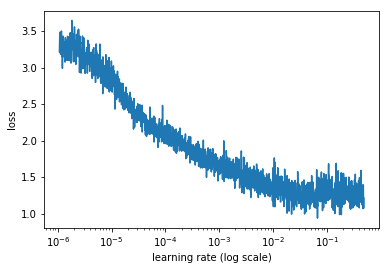

In [0]:
lr_finder.plot_loss()

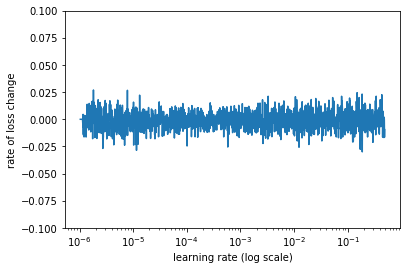

In [0]:
lr_finder.plot_loss_change(sma=20, n_skip_beginning=5, n_skip_end=5, y_lim=(-0.1, 0.1))

Seeing the above plots, I feel 0.005 would be a good learning rate

I tried using the get_best_lr function from the keras_lr_finder library but was unable to due to some errors.

In [0]:
K.set_value(model.optimizer.lr, 0.005)

print("Model learning rate: ")
print(model.optimizer.lr)

Model learning rate: 
<tf.Variable 'SGD/lr:0' shape=() dtype=float32_ref>


# Training for 100 epochs

In [0]:
model_weights_filepath="/content/gdrive/My Drive/Colab Notebooks/eva2_11_model_weights.hdf5"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=0, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Model took 2653.31 seconds to train


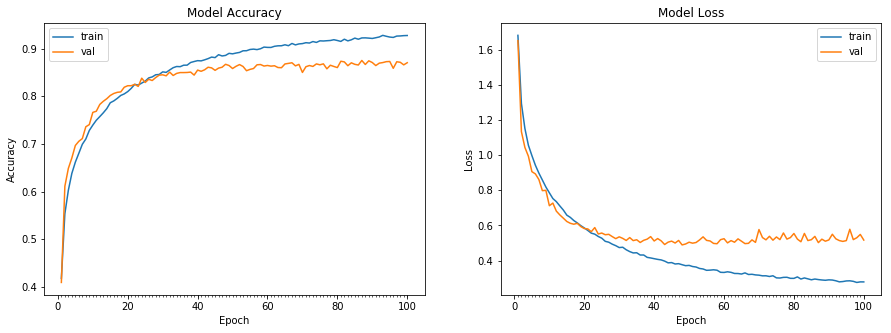

In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))

checkpoint = ModelCheckpoint(model_weights_filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks = callbacks_list,
                                 verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

Load the best model according to validation accuracy

In [0]:
#Load the best model weights according to validation accuracy
model.load_weights(model_weights_filepath)
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])
K.set_value(model.optimizer.lr, 0.005)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

Accuracy on test data is: 87.52


#Finding 25 misclassified images

In [0]:
pred_y_test = model.predict(X_test)
predicted_class = np.argmax(pred_y_test, axis=1)
true_class = np.argmax(Y_test, axis=1)

#Predicted class and true class should be an array
print("Shape predicted_class: " + str(predicted_class.shape))
print("Shape true_class: " + str(true_class.shape))

misclassified_images_index = np.nonzero(predicted_class != true_class)[0]
print("Number of misclassified images: " + str(len(misclassified_images_index)))
print("Indices of misclassified images: " + str(misclassified_images_index))
sample_misclassified_images = np.random.choice( misclassified_images_index,25)
print("Indices of 25 random misclassified images for analysis: " + str(sample_misclassified_images))

Shape predicted_class: (10000,)
Shape true_class: (10000,)
Number of misclassified images: 1248
Indices of misclassified images: [  20   24   26 ... 9967 9968 9982]
Indices of 25 random misclassified images for analysis: [7588  631 5130 1272 3607  853 1088 3735 2251 4139 2650 7446 4476 9386
 6393 9968 3624 4020 8752 5559 9503 3752 3594 3306 7217]


#Grad cam implementation

In [0]:
"""
    Function assumes img in RGB space and not BGR space
"""
def get_heatmap_for_layer(conv_layer_name, num_channels, model, img, class_idx):
    # img = img.reshape((1,32,32,3)
    class_output = model.output[:, class_idx]
    # print("Class output: ")
    # print(class_output)
    conv_layer = model.get_layer(conv_layer_name)
    # print("Conv layer: ")
    # print(conv_layer)
    grads = K.gradients(class_output, conv_layer.output)[0]
    # print("Grads: ")
    # print(grads)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    # print("Pooled grads: ")
    # print(pooled_grads)
    iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img.reshape(1,32,32,3)])
    # print("Shape of conv_layer_output_value: ")
    # print(conv_layer_output_value.shape)
    for i in range(num_channels):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0) # Clipping negative values 
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    return heatmap

# Gradcam for the above computed list of 25 misclassified images


Images from left to right

1.  Base image
2.  Grad cam for predicted class
3.  Base image with overlaid grad came for predicted class
4.  Grad cam for true class
5.  Base image with overlaid grad cam for true class


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

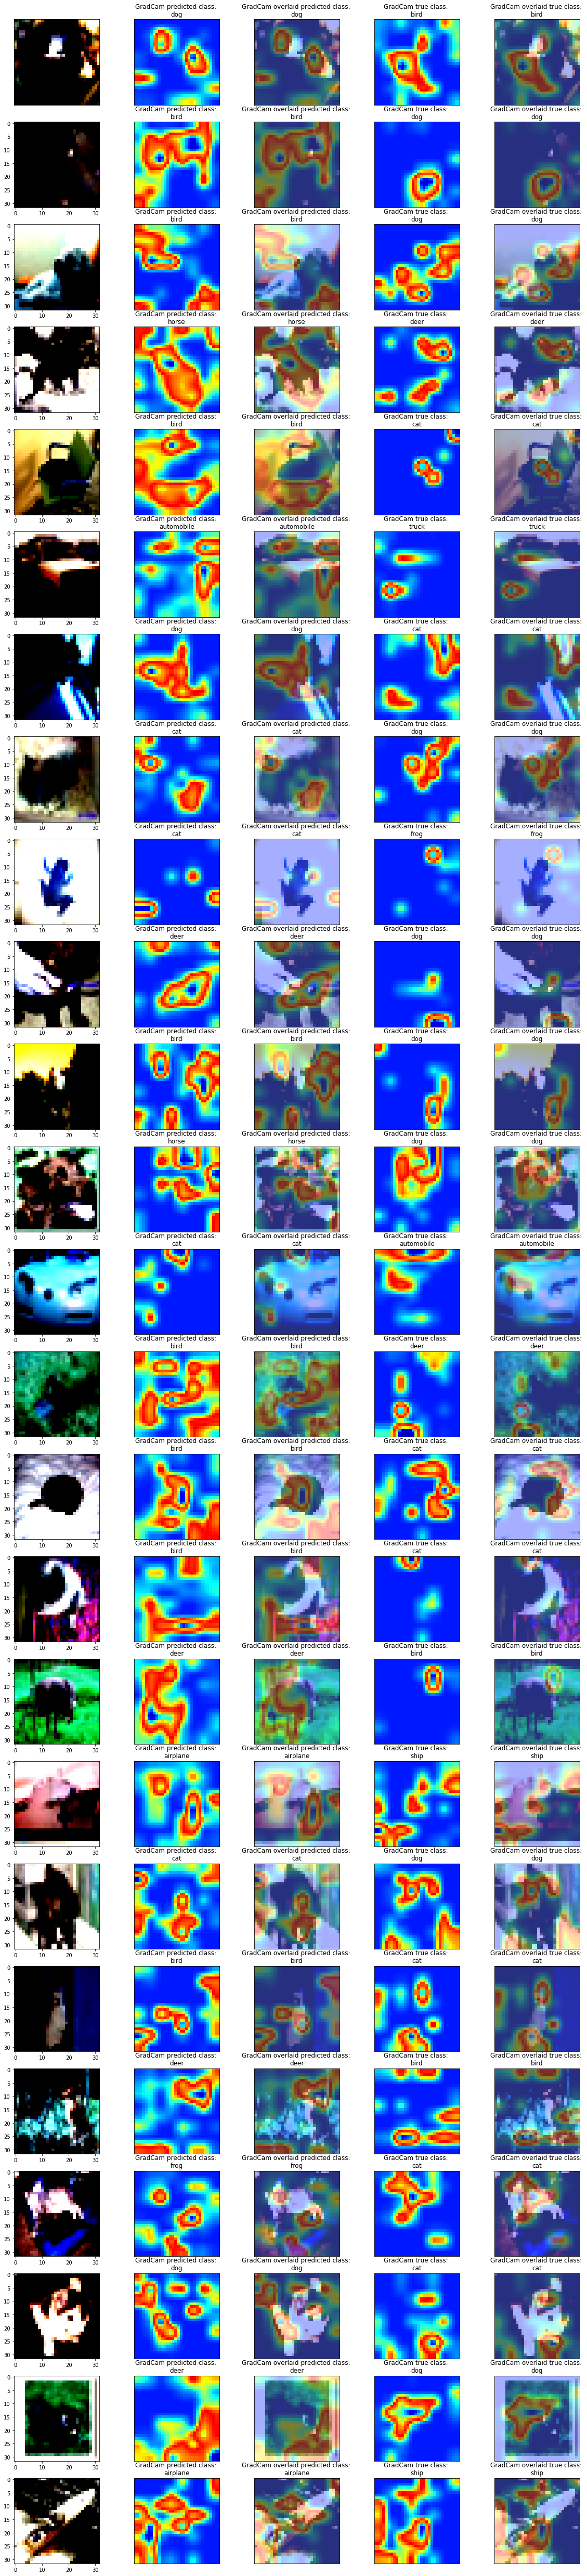

In [0]:
fig, ax = plt.subplots(25,5, figsize = (20,90))

target_layer_for_grad_cam = "batch_normalization_6"
num_channels_target_layer = 256

for i in range(25):
    target_img_idx = sample_misclassified_images[i]
    # print("Target image index = " + str(target_img_idx))
    
    target_img = X_test[target_img_idx]
    target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    pred_class_idx = predicted_class[target_img_idx]
    true_class_idx = true_class[target_img_idx]

    # print("True class index: "  + str(true_class_idx))
    # print("Predicted class index: "  + str(pred_class_idx))

    ax[i][0].imshow(target_img)
    ax[0][0].set_xticks([],[])
    ax[0][0].set_yticks([],[]);
    
    # get_heatmap_for_layer(conv_layer_name, num_channels, model, img, class_idx)
    heatmap_predicted_class = get_heatmap_for_layer(target_layer_for_grad_cam, num_channels_target_layer, model, target_img, pred_class_idx)
    heatmap_true_class = get_heatmap_for_layer(target_layer_for_grad_cam, num_channels_target_layer, model, target_img, true_class_idx)

    heatmap_predicted_class = cv2.applyColorMap(heatmap_predicted_class, cv2.COLORMAP_JET)
    heatmap_predicted_class = cv2.cvtColor(heatmap_predicted_class, cv2.COLOR_BGR2RGB)

    heatmap_true_class = cv2.applyColorMap(heatmap_true_class, cv2.COLORMAP_JET)
    heatmap_true_class = cv2.cvtColor(heatmap_true_class, cv2.COLOR_BGR2RGB)

    ax[i][1].imshow(heatmap_predicted_class)
    ax[i][1].set_title("GradCam predicted class: \n" + class_names[pred_class_idx])
    # ax[i][1].set_title(class_names[pred_class_idx])
    ax[i][1].set_xticks([],[])
    ax[i][1].set_yticks([],[]);

    ax[i][2].imshow(heatmap_predicted_class, alpha = 0.7)
    ax[i][2].imshow(target_img, alpha = 0.5)
    ax[i][2].set_title("GradCam overlaid predicted class: \n" + class_names[pred_class_idx])
    # ax[i][2].set_title(class_names[pred_class_idx])
    ax[i][2].set_xticks([],[])
    ax[i][2].set_yticks([],[]);
    
    ax[i][3].imshow(heatmap_true_class)
    ax[i][3].set_title("GradCam true class: \n" + class_names[true_class_idx])
    # ax[i][3].set_title(class_names[true_class_idx])
    ax[i][3].set_xticks([],[])
    ax[i][3].set_yticks([],[]);

    ax[i][4].imshow(heatmap_true_class, alpha = 0.7)
    ax[i][4].imshow(target_img, alpha = 0.5)
    ax[i][4].set_title("GradCam overlaid true class: \n" + class_names[true_class_idx])
    # ax[i][4].set_title(class_names[true_class_idx])
    # ax[i][j].text(0.25, 0.25, text_msg,  horizontalalignment='left',verticalalignment='bottom', bbox=dict(facecolor='yellow', alpha=0.5), fontsize = 12)
    ax[i][4].set_xticks([],[])
    ax[i][4].set_yticks([],[]);